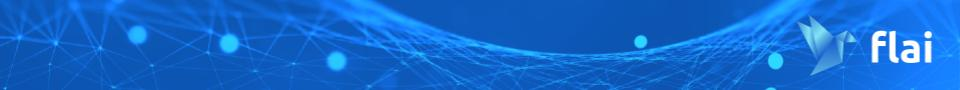

# **Aula 5 - Modelagem para Classificação: Regressão Logística**

## **Importação e Preparação dos Dados**

In [91]:
# importação via github 
import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/insurance.csv'
dados = pd.read_csv(url)

# mise un place
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

# separação de variáveis preditoras e variával resposta
X = dados[['bmi', 'charges']]
y = dados['smoker'] 

## **Upgrade na Técnica de Validação: _K-FOLD_**

In [ ]:
# Configuração da Validação Cruzada

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

validacao = KFold(n_splits = 10, shuffle = True)

---
## **Regressão Logística**

In [92]:
from sklearn.linear_model import LogisticRegression 

modelo = LogisticRegression() 
reglog = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')   
reglog

{'fit_time': array([0.01947808, 0.00985765, 0.01052594, 0.01042914, 0.01077008,
        0.00995898, 0.01020098, 0.0096817 , 0.0096457 , 0.01045322]),
 'score_time': array([0.00240874, 0.00142479, 0.00148654, 0.00150418, 0.00145531,
        0.00146675, 0.00141096, 0.00146937, 0.00140166, 0.00144601]),
 'test_score': array([0.93283582, 0.92537313, 0.86567164, 0.91791045, 0.96268657,
        0.94776119, 0.94776119, 0.97014925, 0.90977444, 0.93984962])}

In [93]:
reglog['test_score']

array([0.93283582, 0.92537313, 0.86567164, 0.91791045, 0.96268657,
       0.94776119, 0.94776119, 0.97014925, 0.90977444, 0.93984962])

In [94]:
reglog['test_score'].mean()

0.9319773313881718

In [95]:
reglog = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision'])   

print('     Acurácia:', round(reglog['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(reglog['test_recall'].mean(), 4))
print('     Precisão:', round(reglog['test_precision'].mean(), 4))

     Acurácia: 0.9328
Sensibilidade: 0.7998
     Precisão: 0.8562


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


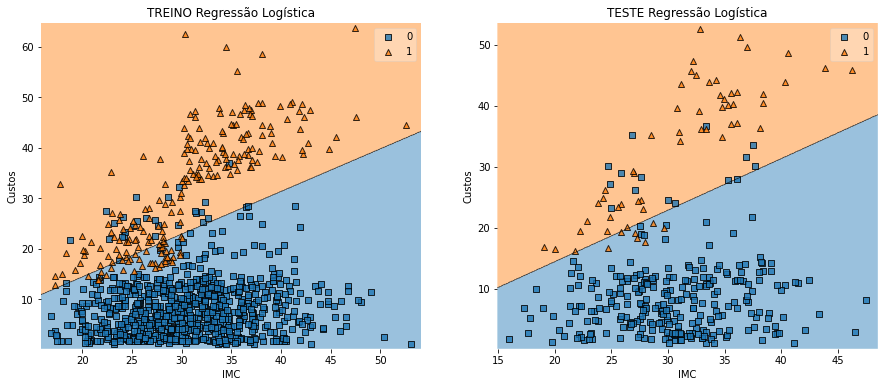

In [96]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
 
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Regressão Logística')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Regressão Logística')   

plt.show()

---
## **KNN**

In [97]:
from sklearn.neighbors import KNeighborsClassifier 

k = 7
modelo = KNeighborsClassifier(n_neighbors = k) 
knn = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision']) 

print('     Acurácia:', round(knn['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(knn['test_recall'].mean(), 4))
print('     Precisão:', round(knn['test_precision'].mean(), 4))

     Acurácia: 0.9581
Sensibilidade: 0.9383
     Precisão: 0.8625


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


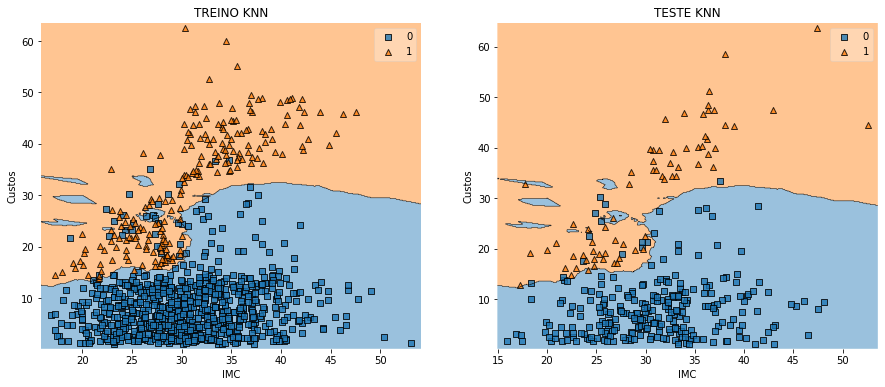

In [98]:
# Região de Decisão

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO KNN')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE KNN')   

plt.show()

---
## **Árvores de Decisão**

In [113]:
from sklearn.tree import DecisionTreeClassifier

profundidade = 5
amostra_minima = 20
modelo = DecisionTreeClassifier(max_depth = profundidade, min_samples_split = amostra_minima)
arvore = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision']) 

print('     Acurácia:', round(arvore['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(arvore['test_recall'].mean(), 4))
print('     Precisão:', round(arvore['test_precision'].mean(), 4))

     Acurácia: 0.9484
Sensibilidade: 0.8893
     Precisão: 0.8694


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


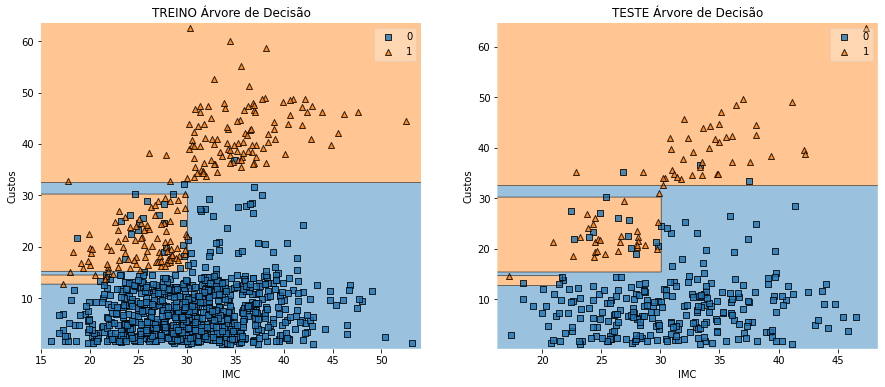

In [114]:
# Região de Decisão

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Árvore de Decisão')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Árvore de Decisão')   

plt.show()

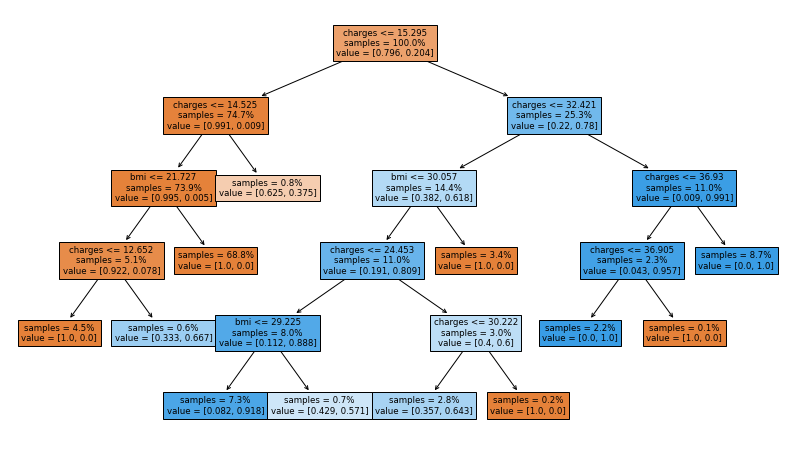

In [115]:
# Plot da Árvore

from sklearn.tree import plot_tree

plt.figure(figsize = (14, 8))
plot_tree(modelo, filled=True, proportion = True, impurity = False, feature_names = X.columns)
plt.show()

---
## **Comparação de Modelos via Validação Cruzada K-FOLD**

In [116]:
modelos = [LogisticRegression(), 
           KNeighborsClassifier(n_neighbors = 5), 
           KNeighborsClassifier(n_neighbors = 15),
           KNeighborsClassifier(n_neighbors = 25),
           KNeighborsClassifier(n_neighbors = 35),
           KNeighborsClassifier(n_neighbors = 45),
           DecisionTreeClassifier(max_depth = 1),
           DecisionTreeClassifier(max_depth = 2),
           DecisionTreeClassifier(max_depth = 3),
           DecisionTreeClassifier(max_depth = 4),
           DecisionTreeClassifier(max_depth = 5)]

nomes = ['Regressão Logística',
         'KNN - K = 5', 
         'KNN - K = 15', 
         'KNN - K = 25', 
         'KNN - K = 35', 
         'KNN - K = 45',
         'Árvore - Prof = 1',
         'Árvore - Prof = 2',
         'Árvore - Prof = 3',
         'Árvore - Prof = 4',
         'Árvore - Prof = 5']

accs = []
sens = []
vpps = []

for modelo in modelos:
    resultados = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision']) 
    accs.append(resultados['test_accuracy'].mean())
    sens.append(resultados['test_recall'].mean())
    vpps.append(resultados['test_precision'].mean())

aux = {'Acurácia': accs, 'Sensibilidade': sens, 'Precisão': vpps}
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by = 'Acurácia', ascending = False).round(4)

,Acurácia,Sensibilidade,Precisão
Árvore - Prof = 3,0.9634,0.9722,0.8641
Árvore - Prof = 4,0.9619,0.9648,0.8668
KNN - K = 35,0.9597,0.9597,0.8638
KNN - K = 45,0.9596,0.9664,0.8571
KNN - K = 25,0.9596,0.9672,0.8605
KNN - K = 15,0.9589,0.9585,0.8603
KNN - K = 5,0.9574,0.9348,0.8704
Árvore - Prof = 5,0.9521,0.9020,0.8695
Regressão Logística,0.9312,0.8028,0.8518
Árvore - Prof = 2,0.9268,0.9622,0.7536


---

# **Exercícios Propostos**

# Encontre os parâmetros que levam o KNN e a Árvore de Decisão ao melhor resultado, justificando seu raciocínio. Investigue a variabilidade dos resultados obtidos através da Validação Cruzada K-FOLD.

---

**_#itstimetoflai_** 